# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('MEDV', axis=1)  # Features
y = data['MEDV']                # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (404, 13)
Testing set shape: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Generate predictions on the training set
train_predictions = model.predict(X_train)

# Generate predictions on the testing set
test_predictions = model.predict(X_test)

# Display the first few predictions for both sets
print("Training set predictions:")
print(train_predictions[:5])

print("\nTesting set predictions:")
print(test_predictions[:5])

Training set predictions:
[10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]

Testing set predictions:
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
from sklearn.metrics import r2_score

# Calculate R-squared for the training set
train_r2 = r2_score(y_train, train_predictions)

# Calculate R-squared for the testing set
test_r2 = r2_score(y_test, test_predictions)

# Print the R-squared values
print(f"R-squared for the training set: {train_r2:.4f}")
print(f"R-squared for the testing set: {test_r2:.4f}")

R-squared for the training set: 0.7509
R-squared for the testing set: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the training set
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate Mean Squared Error for the testing set
test_mse = mean_squared_error(y_test, test_predictions)

# Print the Mean Squared Error values
print(f"Mean Squared Error for the training set: {train_mse:.4f}")
print(f"Mean Squared Error for the testing set: {test_mse:.4f}")

Mean Squared Error for the training set: 21.6414
Mean Squared Error for the testing set: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error for the training set
train_mae = mean_absolute_error(y_train, train_predictions)

# Calculate Mean Absolute Error for the testing set
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the Mean Absolute Error values
print(f"Mean Absolute Error for the training set: {train_mae:.4f}")
print(f"Mean Absolute Error for the testing set: {test_mae:.4f}")

Mean Absolute Error for the training set: 3.3148
Mean Absolute Error for the testing set: 3.1891


## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris
data = load_iris()

In [12]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [13]:
column_names = data.feature_names

In [14]:
df = pd.DataFrame(data['data'],columns=column_names)

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
target = pd.DataFrame(data.target)

In [17]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [47]:
# Load the dataset using whitespace as the delimiter
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Display the first few rows and the shape of the DataFrame
print(data.head())
print(data.shape)

# Check the raw contents of the file if necessary
with open('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', 'r') as file:
    lines = file.readlines()
    for line in lines[:5]:  # Display the first 5 lines
        print(line.strip())

# Assign column names only if the structure is as expected
if data.shape[1] == 14:  # Check for the correct number of columns
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'class']
    data.columns = column_names
else:
    print(f"Expected 14 columns, but got {data.shape[1]} columns.")

# Now, you can proceed to separate features and target variable if column assignment is successful
if 'class' in data.columns:
    X = data.drop('class', axis=1)  # Features
    y = data['class']                # Target variable

    # Split the dataset into training (80%) and testing (20%) sets
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Display the shapes of the resulting sets
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")


        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
(506, 14)
0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70
0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40
0.06905   0

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Step 2: Set the feature matrix and target vector
X = data.iloc[:, :-1]  # All columns except the last one for features
y = data.iloc[:, -1]   # Last column as the target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Generate predictions on training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Step 6: Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Training MSE: {train_mse:.2f}, R²: {train_r2:.2f}')
print(f'Testing MSE: {test_mse:.2f}, R²: {test_r2:.2f}')

Training MSE: 21.64, R²: 0.75
Testing MSE: 24.29, R²: 0.67


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Prepare features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate regression metrics
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Training MSE: {train_mse:.2f}, R²: {train_r2:.2f}')
print(f'Testing MSE: {test_mse:.2f}, R²: {test_r2:.2f}')

Training MSE: 21.64, R²: 0.75
Testing MSE: 24.29, R²: 0.67


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score

# Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Prepare features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Define a threshold to categorize the target variable
threshold = 25  # Example threshold for classification
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Generate binary predictions based on the threshold
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)

# Calculate balanced accuracy score
train_balanced_accuracy = balanced_accuracy_score(y_train_class, train_predictions_class)
test_balanced_accuracy = balanced_accuracy_score(y_test_class, test_predictions_class)

print(f'Training Balanced Accuracy: {train_balanced_accuracy:.2f}')
print(f'Testing Balanced Accuracy: {test_balanced_accuracy:.2f}')

Training Balanced Accuracy: 0.86
Testing Balanced Accuracy: 0.86


## 10. Calculate and print the precision score for both the training and the testing set.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score

# Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Prepare features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Define a threshold to categorize the target variable
threshold = 25  # Example threshold for classification
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Generate binary predictions based on the threshold
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)

# Calculate precision score
train_precision = precision_score(y_train_class, train_predictions_class, zero_division=0)
test_precision = precision_score(y_test_class, test_predictions_class, zero_division=0)

print(f'Training Precision: {train_precision:.2f}')
print(f'Testing Precision: {test_precision:.2f}')

Training Precision: 0.67
Testing Precision: 0.63


## 11. Calculate and print the recall score for both the training and the testing set.

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score

# Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Prepare features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Define a threshold to categorize the target variable
threshold = 25  # Example threshold for classification
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Generate binary predictions based on the threshold
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)

# Calculate recall score
train_recall = recall_score(y_train_class, train_predictions_class, zero_division=0)
test_recall = recall_score(y_test_class, test_predictions_class, zero_division=0)

print(f'Training Recall: {train_recall:.2f}')
print(f'Testing Recall: {test_recall:.2f}')


Training Recall: 0.89
Testing Recall: 0.86


## 12. Calculate and print the F1 score for both the training and the testing set.

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

# Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Prepare features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Define a threshold to categorize the target variable
threshold = 25  # Example threshold for classification
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Generate binary predictions based on the threshold
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)

# Calculate F1 score
train_f1 = f1_score(y_train_class, train_predictions_class, zero_division=0)
test_f1 = f1_score(y_test_class, test_predictions_class, zero_division=0)

print(f'Training F1 Score: {train_f1:.2f}')
print(f'Testing F1 Score: {test_f1:.2f}')

Training F1 Score: 0.76
Testing F1 Score: 0.73


## 13. Generate confusion matrices for both the training and the testing set.

Training Confusion Matrix:
[[245  49]
 [ 12  98]]

Testing Confusion Matrix:
[[69 11]
 [ 3 19]]


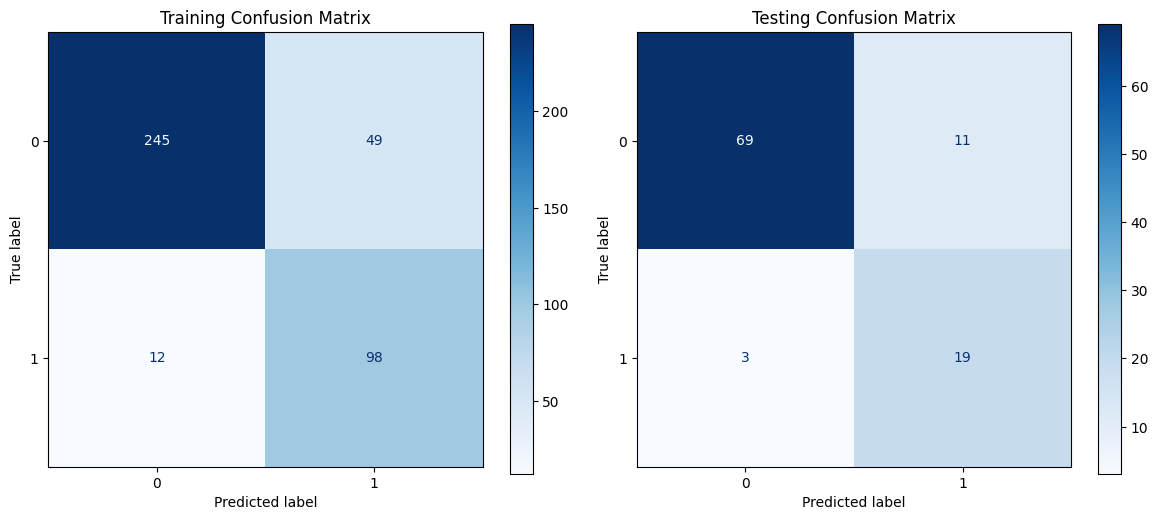

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Prepare features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Define a threshold to categorize the target variable
threshold = 25  # Example threshold for classification
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Generate binary predictions based on the threshold
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)

# Calculate confusion matrices
train_confusion = confusion_matrix(y_train_class, train_predictions_class)
test_confusion = confusion_matrix(y_test_class, test_predictions_class)

# Print confusion matrices
print("Training Confusion Matrix:")
print(train_confusion)
print("\nTesting Confusion Matrix:")
print(test_confusion)

# Optional: Visualize confusion matrices
import matplotlib.pyplot as plt

# Training confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_matrix=train_confusion).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Training Confusion Matrix')

# Testing confusion matrix
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_matrix=test_confusion).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Testing Confusion Matrix')

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

                        Training Accuracy  Testing Accuracy  \
Logistic Regression              0.925743          0.892157   
Decision Tree                    1.000000          0.911765   
Random Forest                    1.000000          0.911765   
Gradient Boosting                1.000000          0.911765   
Support Vector Machine           0.727723          0.784314   
k-Nearest Neighbors              0.876238          0.882353   

                        Training Balanced Accuracy  Testing Balanced Accuracy  \
Logistic Regression                       0.892084                   0.799432   
Decision Tree                             1.000000                   0.877841   
Random Forest                             1.000000                   0.844886   
Gradient Boosting                         1.000000                   0.844886   
Support Vector Machine                    0.500000                   0.500000   
k-Nearest Neighbors                       0.815399                   0.7

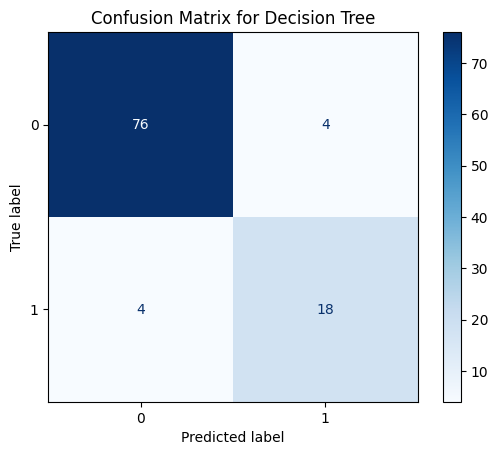

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-model-evaluation-en/your-code/housing.csv', delim_whitespace=True, header=None)

# Prepare features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert the continuous target variable to binary
# For example, using a threshold (e.g., 25)
threshold = 25
y_class = (y >= threshold).astype(int)  # 1 if price >= 25, else 0

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to hold evaluation metrics
results = {}

# Train each model and calculate metrics
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Generate predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Training Accuracy': accuracy_score(y_train, train_predictions),
        'Testing Accuracy': accuracy_score(y_test, test_predictions),
        'Training Balanced Accuracy': balanced_accuracy_score(y_train, train_predictions),
        'Testing Balanced Accuracy': balanced_accuracy_score(y_test, test_predictions),
        'Training Precision': precision_score(y_train, train_predictions),
        'Testing Precision': precision_score(y_test, test_predictions),
        'Training Recall': recall_score(y_train, train_predictions),
        'Testing Recall': recall_score(y_test, test_predictions),
        'Training F1 Score': f1_score(y_train, train_predictions),
        'Testing F1 Score': f1_score(y_test, test_predictions),
    }
    
    results[name] = metrics

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize confusion matrices for the best model (for example)
best_model_name = results_df['Testing F1 Score'].idxmax()
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
best_test_predictions = best_model.predict(X_test)

# Generate confusion matrix for the best model
best_confusion = confusion_matrix(y_test, best_test_predictions)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=best_confusion).plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()